# Multi-layer Perceptron

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Load the dataset:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# Regression problem:

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])

Epoch 1/100
7/7 [==============================] - 1s 5ms/step - loss: 9.9395 - mae: 2.8066
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 7.7913 - mae: 2.4057
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 6.0170 - mae: 2.0315
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 4.5586 - mae: 1.6891
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 3.3702 - mae: 1.4014
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 2.5350 - mae: 1.2154
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 2.0089 - mae: 1.0892
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 1.7319 - mae: 1.0204
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 1.5455 - mae: 0.9767
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 1.4100 - mae: 0.9333
Epoch 11/100
7/7 [==============================] - 0s 4ms/step - loss: 1.3202 

Mean Squared Error: 1.0704326629638672


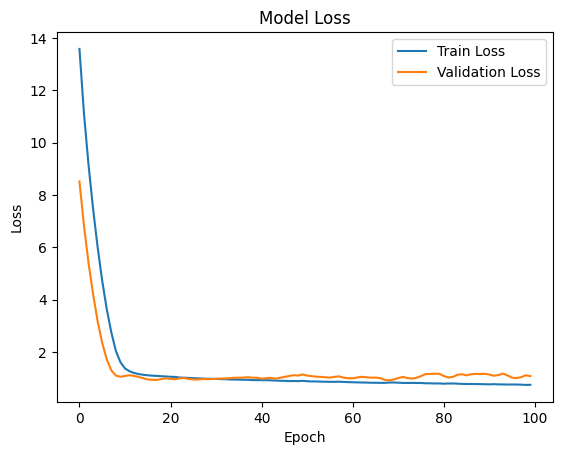

In [11]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt

# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and capture history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluate the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error:", loss)

# Plotting the training and testing loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


# what is a Validation Set? or validation loss?

A Validation Set: 
is a portion of the dataset used during model training to evaluate the model's performance after each training epoch. It helps monitor how well the model generalizes to data it hasn't seen during training (i.e., data other than the training set). The validation set is distinct from the training set and the test set, providing feedback to prevent overfitting—a condition where the model performs well on training data but poorly on unseen data.

Validation Loss:
refers to the loss (or error) calculated on the validation set after each epoch of training. Lower validation loss suggests that the model is learning effectively and generalizing well, while higher validation loss may indicate issues like overfitting or the need for changes to model architecture or hyperparameters.

These concepts are particularly helpful when fine-tuning your model for optimal performance. Would you like to explore any related topics, like regularization or hyperparameter tuning?

# Early stopping of Epochs:


Epoch 1/100
7/7 [==============================] - 1s 57ms/step - loss: 9.8160 - val_loss: 5.3131
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 7.6946 - val_loss: 3.8616
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 5.9045 - val_loss: 2.7282
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 4.4900 - val_loss: 1.8883
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 3.3551 - val_loss: 1.3712
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 2.5318 - val_loss: 1.1640
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 2.0393 - val_loss: 1.1587
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 1.8011 - val_loss: 1.2498
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 1.5805 - val_loss: 1.2959
Epoch 10/100
7/7 [==============================] - 0s 13ms/step - loss: 1.5070 - val_loss: 1.2817
Epoch 11/100
7/7 [=

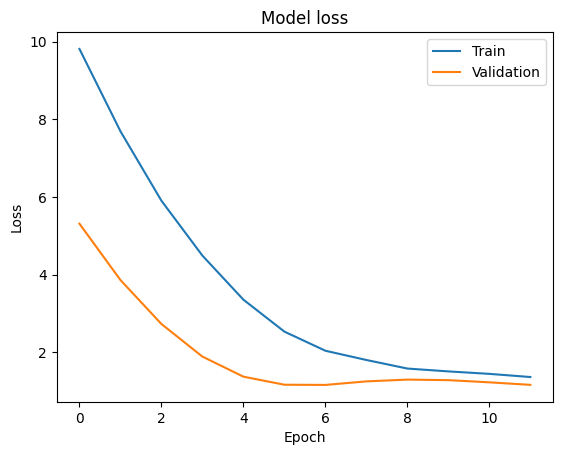

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()